### Import

In [310]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

import sys
sys.path.append('../scripts')

from preprocessing import clear_missing_data, delete_columnns_treshold, non_useful_columns, clear_missing_line, get_numerical, get_categorical, removal_of_duplicates
from pretraitement import imputation_of_categorical_val, imputation_of_numerical_val, onehotencoder
from training import determine_clusters, train_kmeans,predict_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Collecte de données

### Chargement du dataset

In [311]:
# Je charge le dataset en ne prenant que les 100 premières lignes afin de tester les fonctions
path = "../data/dataset.csv" # Chemin du dataset 
df = pd.read_csv(path, nrows=1000, sep=',',encoding="utf-8")

In [312]:
df.shape

(1000, 207)

### Préparation des données

##### Nettoyage des colonnes

In [313]:
# Suppressions des colonnes avec 100% données manquantes
df = clear_missing_data(df)

Nombre de colonnes vides (100% de valeurs manquantes) : 73


In [314]:
# Suppressions des colonnes avec 70% données manquantes
df = delete_columnns_treshold(df)

Les colonnes supprimées sont : Index(['starch_100g', 'omega-3-fat_100g',
       'fruits-vegetables-nuts-estimate_100g', 'cocoa_100g', 'molybdenum_100g',
       'chromium_100g', 'polyunsaturated-fat_100g', 'iodine_100g',
       'added-sugars_100g', 'polyols_100g', 'vitamin-k_100g', 'selenium_100g',
       'packaging_text', 'monounsaturated-fat_100g', 'caffeine_100g',
       'manganese_100g', 'phosphorus_100g', 'biotin_100g',
       'pantothenic-acid_100g', 'vitamin-b9_100g', 'copper_100g',
       'vitamin-e_100g', 'vitamin-b12_100g', 'vitamin-pp_100g',
       'vitamin-b2_100g', 'brand_owner', 'zinc_100g', 'vitamin-b1_100g',
       'first_packaging_code_geo', 'cities_tags', 'vitamin-c_100g',
       'vitamin-b6_100g', 'vitamin-a_100g', 'vitamin-d_100g', 'magnesium_100g',
       'alcohol_100g', 'emb_codes_tags', 'emb_codes', 'generic_name',
       'iron_100g', 'trans-fat_100g', 'calcium_100g', 'cholesterol_100g',
       'potassium_100g', 'traces', 'traces_tags', 'traces_en', 'allergens',
 

In [315]:
# Suppressions des colonnes non pertinentes
df = non_useful_columns(df)



Les colonnes supprimées sont : ['Unnamed: 0', 'url', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'last_modified_by', 'last_updated_t', 'brands_tags', 'last_updated_datetime', 'countries_tags', 'countries_en', 'states_tags', 'states_en', 'image_url', 'image_small_url', 'image_nutrition_url', 'image_nutrition_small_url']


##### Nettoyage des lignes

In [316]:
# Suppressions des lignes vides

df = clear_missing_line(df)

Nombre de lignes vides (100% de valeurs manquantes) : 0


#### Supression des doublons

In [317]:
# Netoyage des doublons
df = removal_of_duplicates(df)

### Imputation des données

In [318]:
df_num = df.select_dtypes(include=['number'])  # Garder uniquement les colonnes numériques
df_cat = df.select_dtypes(exclude=['number'])  # Garder uniquement les colonnes catégorielles



In [319]:
# Imputation des valeurs manquantes pour les colonnes numériques
df_num = imputation_of_numerical_val(df_num)

In [320]:
# Imputation des valeurs manquantes pour les colonnes catégorielles
df_cat = imputation_of_categorical_val(df_cat)

In [321]:
# Assurer que df_num et df_cat ont les mêmes index que df
df[df_num.columns] = df_num
df[df_cat.columns] = df_cat


In [322]:
df

,code,creator,product_name,quantity,brands,categories,categories_tags,categories_en,labels,labels_tags,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,54,kiliweb,Limonade artisanale a la rose,700ml,Phillips Gourmet,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,700.0,7.517876,2.578927,12.193853,5.311864,3.013989,13.904904,0.989011,0.395605,19.166958
1,63,kiliweb,Tablette Tanzanie,700ml,Phillips Gourmet,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,700.0,7.517876,2.578927,12.193853,5.311864,3.013989,13.904904,0.780011,0.312005,0.000000
2,114,kiliweb,Chocolate n 3,80 g,Jeff de Bruges,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","Point Vert, Fabriqué en France","en:green-dot,en:made-in-france",...,2415.0,44.000000,28.000000,30.000000,27.000000,10.292500,7.100000,0.025000,0.010000,19.166667
3,1,inf,KOJI MISO PASTE,300g,UMAMI,"Supplements, Vegtable","en:supplements,en:vegtable","Supplements,Vegtable","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...",...,874.0,6.000000,1.000000,21.400000,11.100000,2.000000,11.200000,11.800000,4.720000,100.000000
4,105,kiliweb,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,1238.0,7.165876,2.468927,11.957853,2.831864,5.085989,27.600904,1.063011,0.425205,0.011335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,105000066,kiliweb,Herbal Tea Cinnamon,700ml,Phillips Gourmet,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.0,0.000000,0.000000,60.000000,0.000000,0.000000,0.000000,1.000000,0.400000,0.000000
996,105000073,usda-ndb-import,"Herbal Tea, Hibiscus",700ml,Lagg's,Beverages,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,1117.0,0.000000,2.918000,60.000000,4.066667,5.573333,66.670000,0.337820,0.135128,0.000000
997,105000196,usda-ndb-import,Apple & Cinnamon Tea,700ml,Lagg's,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.0,0.000000,2.918000,60.000000,4.066667,5.573333,66.670000,0.337820,0.135128,0.000000
998,105000219,usda-ndb-import,"Lagg's, green tea",700ml,Lagg's,"Plant-based foods and beverages, Beverages, Ho...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Hot ...","No GMOs, Non GMO project","en:no-gmos,en:non-gmo-project",...,0.0,0.000000,2.918000,2.670000,4.066667,5.573333,0.000000,0.000000,0.000000,0.000000


### Pretraitement

In [323]:
df = onehotencoder(df)

### Entrainement 

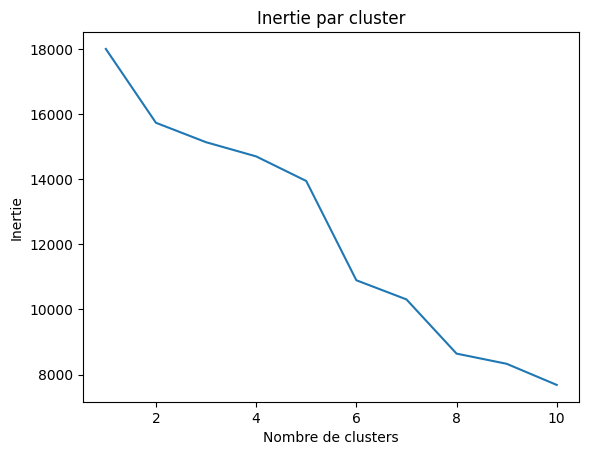

<module 'matplotlib.pyplot' from 'd:\\Logiciel\\conda\\envs\\clustering_OFF\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [324]:
# Normalisation des données (important pour K-Means)
from sklearn.discriminant_analysis import StandardScaler



# Normaliser les colonnes numériques uniquement
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Réassembler les données (optionnel : si besoin de garder les catégories)
df_scaled = pd.concat([df_num_scaled, df_cat], axis=1)

# Étape 1 : Trouver le bon nombre de clusters
determine_clusters(df_num_scaled)



In [ ]:
# Étape 2 : Entraîner le modèle avec un nombre de clusters optimal (ex: 4)
model = train_kmeans(df_num, nb_clusters=6)

In [326]:
predictions = predict_data(model, df_num)



In [327]:
import pandas as pd

# Ajouter les prédictions au DataFrame
df_num['Cluster'] = predictions

# Afficher les premières lignes du DataFrame avec les clusters
print(df_num.head())


   code  serving_quantity  additives_n  product_quantity  unique_scans_n  \
0    54             120.6          2.2             308.0             1.4   
1    63             122.2          0.0             427.8             1.0   
2   114              41.6          2.8              80.0             1.0   
3     1               0.0          0.0             300.0             1.0   
4   105               5.0          2.0             750.0             1.0   

   completeness  last_image_t  energy-kcal_100g  energy_100g   fat_100g  \
0        0.1625  1.733085e+09         167.29876        700.0   7.517876   
1        0.2625  1.732913e+09         167.29876        700.0   7.517876   
2        0.4750  1.737248e+09         581.60000       2415.0  44.000000   
3        0.8625  1.738677e+09         209.00000        874.0   6.000000   
4        0.6750  1.738074e+09         295.85876       1238.0   7.165876   

   saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  \
0            2.578927 

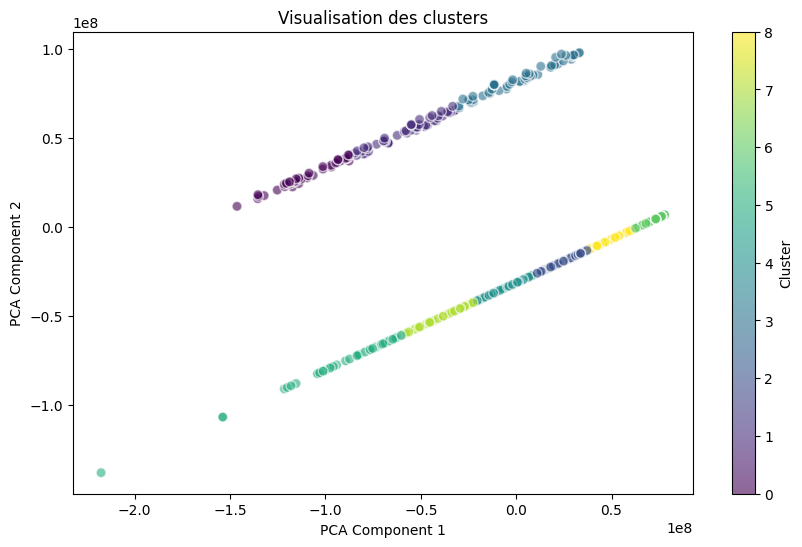

In [328]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduire les dimensions à 2 pour la visualisation
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_num.drop(columns=['Cluster']))

# Visualiser les clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis', alpha=0.6, edgecolors='w', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisation des clusters')
plt.colorbar(label='Cluster')
plt.show()


In [329]:
# Taille des clusters
cluster_sizes = df_num['Cluster'].value_counts()
print("Taille des clusters :")
print(cluster_sizes)

# Statistiques descriptives par cluster
cluster_stats = df_num.groupby('Cluster').mean()
print("Statistiques descriptives par cluster :")
print(cluster_stats)


Taille des clusters :
Cluster
6    225
1    179
8    143
2     99
4     94
5     83
7     76
3     58
0     43
Name: count, dtype: int64
Statistiques descriptives par cluster :
                 code  serving_quantity  additives_n  product_quantity  \
Cluster                                                                  
0        1.022541e+08         18.401172     0.134884        249.018605   
1        1.004975e+08        149.552623     0.271508        336.143017   
2        4.597071e+02         69.887935     1.993939        483.490348   
3        1.021475e+08         24.698366     0.100000        293.172414   
4        4.810957e+02         60.499213     1.897872        744.511616   
5        5.122169e+02         69.998024     2.171084        326.879518   
6        3.653156e+02         56.175600     2.056000        482.633916   
7        6.027895e+02         63.804868     1.913158        299.819132   
8        4.689930e+02         80.097273     2.158042        438.865483   

        